## Data Prep:

1. Read in the data and apply your data prep function to it.

In [1]:
import pandas as pd
import numpy as np

In [2]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [3]:
income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_prep(income)

## Assignment 1:

1. Scale your feature data frames
2. Fit a KNN model with k = 5, using the features `age` and `hoursperweek`
3. Print the model accuracy score and confusion matrix for both the training and test data
4. Using the test data, create a scatterplot with `age` in the x-axis, `hoursperweek` in the y-axis, and color each point with the predicted class.

In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train[['age', 'hoursperweek']])
X_test_std = std.transform(X_test[['age', 'hoursperweek']])

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_train_std, y_train)

0.7486904854976155

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, knn.predict(X_train_std))

array([[17040,  2362],
       [ 4067,  2113]], dtype=int64)

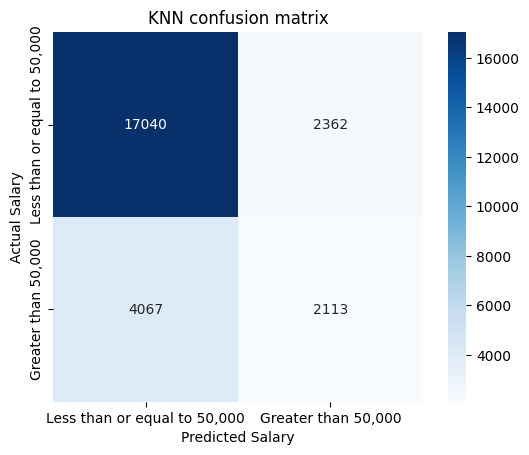

In [17]:
import seaborn as sns

knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='KNN confusion matrix'
);

In [13]:
knn.score(X_test_std, y_test)

0.7401500938086304

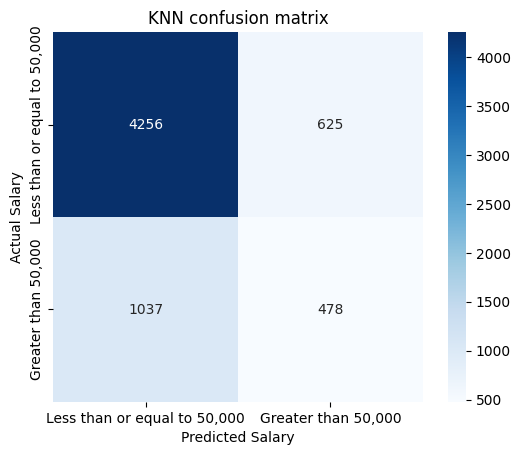

In [18]:
knn_confusion = confusion_matrix(y_test, knn.predict(X_test_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='KNN confusion matrix'
);

<Axes: xlabel='age', ylabel='hoursperweek'>

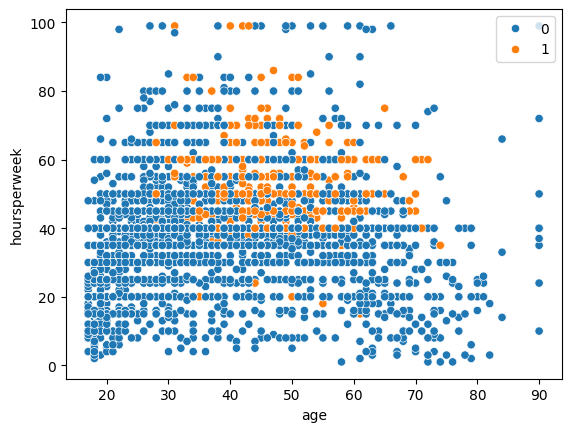

In [22]:
sns.scatterplot(x=X_test["age"], y=X_test["hoursperweek"], hue=knn.predict(X_test_std))

## Assignment 2: 

1. Fit a KNN with all features and k=5. Print train and test accuracy.
2. Use GridSearchCV to find the optimal value for k, then print test accuracy and the confusion matrix.

In [25]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

KNeighborsClassifier()

In [27]:
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Jeffr\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.8745211476819639
0.8242651657285803


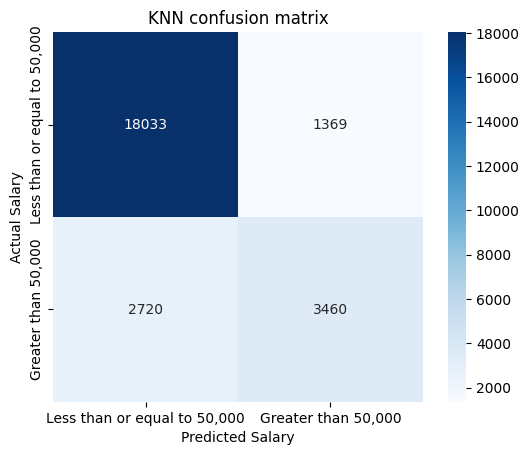

In [38]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='KNN confusion matrix'
);

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), "metric": ["minkowski", "manhattan"]}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train_std, y_train)
gridsearch.best_params_

{'metric': 'manhattan', 'n_neighbors': 49}

In [31]:
knn = KNeighborsClassifier(n_neighbors=59, metric="manhattan")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=59)

In [32]:
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

0.8397310609021968
0.8405253283302064


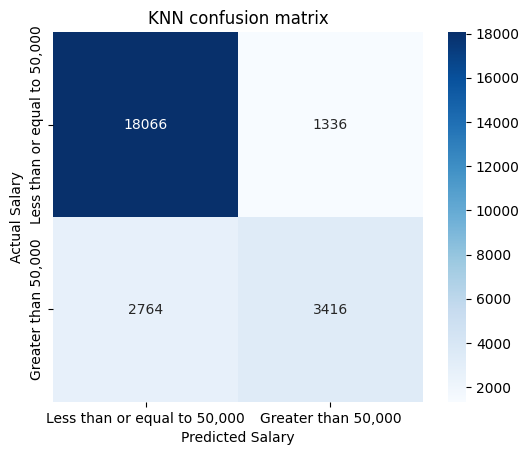

In [33]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='KNN confusion matrix'
);

In [35]:
knn = KNeighborsClassifier(n_neighbors=49, metric="manhattan")
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=49)

In [36]:
print(knn.score(X_train_std, y_train))
print(knn.score(X_test_std, y_test))

0.8401610507388008
0.8405253283302064


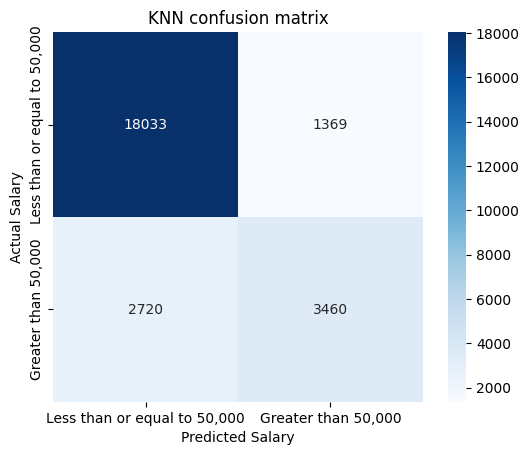

In [37]:
knn_confusion = confusion_matrix(y_train, knn.predict(X_train_std))
                                 
sns.heatmap(
    knn_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Less than or equal to 50,000", "Greater than 50,000"],        
    yticklabels=["Less than or equal to 50,000", "Greater than 50,000"]
).set(
    xlabel='Predicted Salary',
    ylabel='Actual Salary',
    title='KNN confusion matrix'
);